Para la siguiente tarea, se utilizan las siguientes bibliotecas en Python, que se importan de una vez: 

In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
sns.set_theme()

## Ejercicio 1
Muestre que el estimador de regresión ridge se puede obtener por mínimos cuadrados
usuales agregado $p$ filas adicionales $\sqrt{\lambda} \mathbf{I}_{pp}$ a la matriz $\mathbf{X}$ y agregando $p$ ceros al vector de respuestas $\mathbf{Y}$.

### Respuesta

Sea $\mathbf{X}$ una matriz de tamaño $n\times p$ de predictores, $\mathbf{Y}$ un vector columna de tamaño $n$ de variables de respuesta,
$\mathbf{X}_r$ la matriz $\mathbf{X}$ con las filas adicionales con forma $\sqrt{\lambda} \mathbf{I}_{pp}$ donde $\lambda$ es un valor escalar, y $\mathbf{Y}_r$ el vector columna de respuestas con $p$ ceros añadidos, en ambos casos al final de la matriz o vector. 

Recordando que el estimador por regresión ridge se define de la siguiente manera:

$$
\hat{\beta}_R = \left(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I}\right)^{-1}\mathbf{X}^T\mathbf{Y}\tag{1}
$$

Y que el estimador de mínimos cuadrados tiene la siguiente forma:

$$
\hat{\beta} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{Y}\tag{2}
$$

Entonces, considerando las matrices $\mathbf{X}_r$ y $\mathbf{Y}_r$ y aplicando la regresión de mínimos cuadrados, se tiene lo siguiente:

$$
\hat{\beta}_r = \left(\mathbf{X}_r^T\mathbf{X}_r\right)^{-1}\mathbf{X}_r^T\mathbf{Y}_r\tag{3}
$$

Si se desglosan las matrices de la siguiente manera:

$$\begin{align*}
\mathbf{X}_r &= \begin{bmatrix}\mathbf{X} \\ \sqrt{\lambda}\mathbf{I}_{pp}\end{bmatrix}; &
\mathbf{Y}_r &= \begin{bmatrix}\mathbf{Y} \\ \mathbf{0}_{p}\end{bmatrix}
\end{align*}
$$
Vale la pena recalcar que la notación $\mathbf{0}_{p}$ indica un vector columna de ceros de tamaño p. Sustituyendo en la ecuación $3$:
$$\begin{align*}
\hat{\beta}_r &= \left(
    \begin{bmatrix}\mathbf{X}^T & \sqrt{\lambda}\mathbf{I}_{pp}\end{bmatrix}
    \begin{bmatrix}\mathbf{X} \\ \sqrt{\lambda}\mathbf{I}_{pp}\end{bmatrix}
    \right)^{-1}
    \begin{bmatrix}\mathbf{X}^T & \sqrt{\lambda}\mathbf{I}_{pp}\end{bmatrix}
    \begin{bmatrix}\mathbf{Y} \\ \mathbf{0}_{p}\end{bmatrix} \\
    
    &=
    \left(\mathbf{X}^T\mathbf{X} + \sqrt{\lambda}\mathbf{I}_{pp}\sqrt{\lambda}\mathbf{I}_{pp}\right)^{-1}
    \begin{bmatrix}\mathbf{X}^T & \sqrt{\lambda}\mathbf{I}_{pp}\end{bmatrix}
    \begin{bmatrix}\mathbf{Y} \\ \mathbf{0}_{p}\end{bmatrix} \\

    &=
    \left(\mathbf{X}^T\mathbf{X} + \sqrt{\lambda}^2\mathbf{I}_{pp}\right)^{-1}
    \begin{bmatrix}\mathbf{X}^T & \sqrt{\lambda}\mathbf{I}_{pp}^2\end{bmatrix}
    \begin{bmatrix}\mathbf{Y} \\ \mathbf{0}_{p}\end{bmatrix} \\

    &=
    \left(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I}_{pp}\right)^{-1}
    \left(\mathbf{X}^T \mathbf{Y} + \sqrt{\lambda}\mathbf{I}_{pp}\mathbf{0}_{p}\right) \\

    \hat{\beta}_r &=
    \left(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I}_{pp}\right)^{-1}\mathbf{X}^T\mathbf{Y}
\end{align*}$$
$$\therefore \hat{\beta}_r = \hat{\beta}_R$$

Vale la pena recordarse que la matriz identidad es idempotente, por lo que puede hacerse el segundo paso mostrado. Con esto, puede observarse que el resultado obtenido es idéntico al mostrado en la ecuación $1$. Con esto concluye la demostración. $\blacksquare$

## Ejercicio 2

Los valores ajustados $\widehat{\mathbf{Y}}$ por mínimos cuadrados usuales satisfacen la igualdad $\widehat{\mathbf{Y}} = \mathbf{PY}$ donde $\mathbf{PY}$ es la matriz de proyección ortogonal. Una consecuencia de este hecho es que los residuales $\widehat{\epsilon} =\widehat{\mathbf{Y}} - \mathbf{Y}$ y el vector de respuestas $Y$ son ortogonales.
1. Demuestre que la matriz $\mathbf{P}_\lambda = \mathbf{X}\left(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I}\right)^{-1}\mathbf{X}^T$, asociada a la regresión ridge, no es una matriz de proyección para todo $\lambda > 0$
2. Demuestre que para cualquier $\lambda > 0$ los valores ajustados $\widehat{\mathbf{Y}}(\lambda)$ no son ortogonales con los residuales ridge $\widehat{\epsilon} =\widehat{\mathbf{Y}}(\lambda) - \mathbf{Y}$.


### Respuesta

Para el primer inciso, se sabe que una matriz de proyección debe ser idempotente. Como es una condición necesaria para ser una matriz de proyección, con que no cumpla esta condición para todo $\lambda>0$ basta para demostrar que no es una matriz de proyección.

En primera instancia, considerando la descomposición  SVD de $\mathbf{X} = UDV^T$, se obtiene el valor de $\mathbf{P}_\lambda$:

Considerando la descomposición SVD de $\mathbf{X} = UDV^T$, se obtiene lo siguiente:
$$\begin{align*}
\mathbf{P}_\lambda &= 
UDV^T\left(VD^TU^TUDV^T + \lambda \mathbf{I}\right)^{-1}VD^TU^T \\

&= 
UDV^T\left(VD^TDV^T + \lambda \mathbf{I}\right)^{-1}VD^TU^T\\

&= 
UDV^T\left(VD^TDV^T + \lambda VV^T\right)^{-1}VD^TU^T \\

&= 
UDV^T\left(D^TDV^T + \lambda V^T\right)^{-1}(V)^{-1}VD^TU^T \\

&=
UDV^T(V^T)^{-1}\left(D^TD + \lambda \mathbf{I}\right)^{-1}(V)^{-1}VD^TU^T \\ 

&=
UD\left(D^TD + \lambda \mathbf{I}\right)^{-1}D^TU^T\tag{4}
\end{align*}$$

Si esta matriz fuera idempotente, entonces su traza sería equivalente a su rango. Esta demostración se omite, pero puede obtenerse relativamente fácil de encontrar los eigenvalores de una matriz idempotente. Debido a que debe cumplirse para una matriz idempotente:
$$\mathrm{tr}(\mathbf{P}) = \mathrm{rank}(\mathbf{P})$$
Puede usarse como criterio para determinar si $\mathbf{P}_\lambda$ es una matriz de proyección.
Obteniendo la traza del resultado mostrado en $4$:
$$\begin{align*}
\mathrm{tr}(\mathbf{P}_\lambda) &= \mathrm{tr}\left(UD\left(D^TD + \lambda \mathbf{I}\right)^{-1}D^TU^T\right) \\

&= 
\mathrm{tr}\left(D\left(D^TD + \lambda \mathbf{I}\right)^{-1}D^T\right)
\end{align*}$$
Debido a que $D$ es una matriz diagonal, entonces puede obtenerse la traza sumando tal cual cada uno de los valores de la siguiente manera:
$$\mathrm{tr}(\mathbf{P}_\lambda) = \sum_{i=1}^p \frac{d_i^2}{d_i^2+\lambda}$$
Donde $i$ representa cada uno de los valores singulares. Puede observarse que 
para todo $\lambda>0$ el $i$-ésimo elemento de esta suma es menor que 1, con la siguiente desigualdad:
$$\frac{d_i^2}{d_i^2+\lambda} < 1;\quad d_i^2 < d_i^2 + \lambda$$
Debido a que la suma de cada uno de estos elementos es menor que 1, si se suman todos los elementos:
$$\mathrm{tr}(\mathbf{P}_\lambda)<\mathrm{rank}(D)$$
Esto puede estarse seguro ya que el número de valores singulares es igual al rango de la matriz $D$. Con esto concluye la demostración del primer inciso. $\blacksquare$

Para el segundo inciso, conviene recordar que si un par de vectores son ortogonales entonces el producto punto (o la proyección, alternativamente) en otro es cero. Alternativamente, sean $v$ y $w$ dos vectores de la misma dimensión que además son ortogonales, entonces se cumple la siguiente igualdad:
$$u\cdot v = u^Tv = v^Tu = 0$$
Donde $(\cdot)$ representa el producto punto. 
Entonces, sean los residuales de ridge $\mathbf{\widehat{Y}-Y} = \widehat{\epsilon}$, y $\mathbf{\widehat{Y} = \mathbf{P}_\lambda Y}$. Entonces, la proyección de un vector en el otro es dado por la siguiente ecuación:
$$
    \begin{gather*}
    (\mathbf{P}_\lambda \mathbf{Y})^T \left(\mathbf{\widehat{Y}-Y}\right) \\

    \mathbf{Y}^T\mathbf{P}_\lambda^T \left(\mathbf{\mathbf{P}_\lambda \mathbf{Y}-Y}\right) \\

    \mathbf{Y}^T\mathbf{P}_\lambda^T \left(\mathbf{\mathbf{P}_\lambda -I}\right)\mathbf{Y} \\

    \mathbf{Y}^T \left(\mathbf{P}_\lambda^T\mathbf{\mathbf{P}_\lambda -\mathbf{P}_\lambda^T}\right)\mathbf{Y}
    \end{gather*}
$$
Recordando que $\mathbf{P}_\lambda = \mathbf{X}\left(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I}\right)^{-1}\mathbf{X}^T$, y sea $\mathbf{A} = \left(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I}\right)^{-1}$, entonces:
$$\mathbf{P}_\lambda = \mathbf{X}\mathbf{A}\mathbf{X}^T$$
$$
\begin{gather*}
\mathbf{Y}^T \left((\mathbf{X}\mathbf{A}\mathbf{X}^T)^T\mathbf{X}\mathbf{A}\mathbf{X}^T -\mathbf{X}\mathbf{A}\mathbf{X}^T\right)\mathbf{Y} \\

\mathbf{Y}^T \left(\mathbf{X}\mathbf{A}^T\mathbf{X}^T\mathbf{X}\mathbf{A}\mathbf{X}^T -\mathbf{X}\mathbf{A}\mathbf{X}^T\right)\mathbf{Y}\tag{5}
\end{gather*}
$$
Transponiendo $\mathbf{A}$:
$$\mathbf{A}^T = \left(\left(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I}\right)^{-1}\right)^T$$
Sabiendo que es invertible:
$$\begin{align*}
\mathbf{A}^T &= \left(\left(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I}\right)^T\right){-1} \\
\mathbf{A}^T &= \left(\left((\mathbf{X}^T\mathbf{X})^T + (\lambda \mathbf{I})?T\right)\right){-1} \\
\mathbf{A}^T &= \left(\left(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I}\right)\right){-1} \\
\mathbf{A}^T &= \mathbf{A}
\end{align*}$$

Por lo que, sustituyendo en el resultado en $5$:
$$\mathbf{Y}^T \left(\mathbf{X}\mathbf{A}\mathbf{X}^T\mathbf{X}\mathbf{A}\mathbf{X}^T -\mathbf{X}\mathbf{A}\mathbf{X}^T\right)\mathbf{Y}$$
$$\mathbf{Y}^T \left(\mathbf{P^2}_\lambda -\mathbf{P}_\lambda\right)\mathbf{Y}$$

En el inciso anterior se demostró que la matriz $\mathbf{P}_\lambda$ no es idempotente, por lo que el término $\mathbf{P^2}_\lambda -\mathbf{P}_\lambda$ es distinto a $\mathbf{0}$. Entonces, no se cumple la ortogonalidad de las predicciones contra los residuales estimados de Ridge, ya que este resultado es distinto de cero para todo $\mathbf{Y}$ que sea distinto al vector 0, y con esto concluye la demostración.$\blacksquare$

Vale la pena mencionarse que en el ejercicio 1 de la tarea se ve que puede hacerse una expresión de la regresión Ridge equivalente a mínimos cuadrados, donde efectivamente se cumple la ortogonalidad de la matriz. Sin embargo, debido a que se incluyeron filas adicionales tanto en las variables regresoras como en la de respuesta, corresponderían a observaciones que no existieron, por lo que no tiene por qué cumplirse la ortogonalidad con los datos reales (es decir, aquellos que no se les "agregaron" otros valores).




## Ejercicio 3
Algunas veces se tiende a pensar que se puede detectar una matriz mal condicionada al observar valores pequeños en la diagonal de la matriz. Y que, por lo tanto, una matriz sin valores pequeños en la diagonal estará bien condicionada. Sin embargo, esto no es cierto. Para ilustrar este hecho, considere las matrices:

$$
\begin{bmatrix}
0.501 & -1    & 0      & ...   & 0  \\
0     & 0.502 & -1     &       & 0  \\
\vdots&       & \ddots & \ddots &  \\
0     & 0     & 0      & 0.599 & -1 \\
0     & 0     & 0      & 0     & 0.600
\end{bmatrix} 
\quad \mathrm{y} \quad 
\begin{bmatrix}
1 & -1 & -1     & ...  & -1  \\
0 & 1  & -1     &      & -1 \\
\vdots &   & \ddots & \ddots  & \\
0 & 0  & 0      & 1    & -1 \\
0 & 0  & 0      & 0    & 1
\end{bmatrix}
$$

Halle el número de condición de dichas matrices, usando este número de condición se puede observar que ambas matrices están mal condicionadas, aunque ninguna tiene elementos pequeños en la diagonal.

### Respuesta

Sea $A$ la primera matriz y $B$ la segunda matriz mostrada. Debido a que no se especifica la dimensión de B, se asume un tamaño arbitrario. 
Para la matriz $A$ su tamaño sí es determinado por lo que puede calcularse directamente el número de condición, con el siguiente script [^1] de Python:

[^1]: No todos los scripts de Python mostrados en esta tarea se escriben para ser corridos individualmente y encontrarse encapsulados. Si se corren secuencialmente, entonces no deben existir errores. Se hace de esta manera para que cuando se refiera a un ejemplo, pueda describirse inmediatamente al código al que se refiere. 

In [2]:
A = np.diag(np.arange(0.501,0.6001,0.001)) + np.diag(-np.ones(99),1)
cond_A = np.linalg.cond(A)
print(f'Número de condición de la matriz A: {cond_A:.4e}')

Número de condición de la matriz A: 2.2097e+26


Para la matriz B se propone graficar el número de condición contra la dimensión de la matriz.


Text(0.5, 1.0, 'Número de condición de la matriz B contra dimensión')

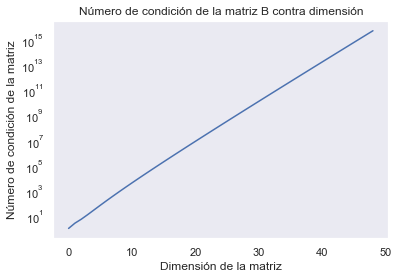

In [3]:
maxdim = 50
ncond = []
for n in range(1,maxdim):
    ones = np.ones(n)
    B = np.triu(-ones,1)+np.diag(ones)
    ncond.append(np.linalg.cond(B))

plt.yscale('log')
plt.grid()
plt.grid(which='minor',alpha=0.2)
plt.plot(ncond)
plt.xlabel('Dimensión de la matriz')
plt.ylabel('Número de condición de la matriz')
plt.title('Número de condición de la matriz B contra dimensión')

Puede verse que el número de condición de la matriz $B$ crece rápidamente contra la dimensión de la matriz.

## Ejercicio 4
Considere la matriz $\mathbf{A} = \begin{bmatrix}1 & \alpha \\ \alpha & 1\end{bmatrix}$ , halle su número de condición, $\kappa(\mathbf{A})$, y demuestre que $\lim_{\alpha\rightarrow1}\kappa(\mathbf{A}) = \infty$. Por otro lado, considere la matriz $\mathbf{B} = \begin{bmatrix}  \alpha & 0\\  0& \alpha\end{bmatrix}$, se podría pensar que cuando $\alpha\rightarrow0$, la matriz B está mal condicionada. Halle el número de condición de la matriz $\mathbf{B}$, $\kappa(\mathbf{B})$, y calcule $\lim_{\alpha\rightarrow0}\kappa(\mathbf{B})$, ¿es cierto que cuando $\alpha\rightarrow0$, $\kappa(\mathbf{B})$ se vuelve una matriz mal condicionada?

### Respuesta

Para encontrar el número de condición de $\mathbf{A}$, se aprovecha que es una matriz normal.
Para demostrar que es normal, basta con ver que $\mathbf{A}= \mathbf{A}^T$, por lo que $\mathbf{A}\mathbf{A}^T = \mathbf{A}^T\mathbf{A}$.
Debido a que es una matriz normal con entradas reales, su número de condición puede calcularse de la siguiente manera:
$$\kappa(\mathbf{A}) = \left|\frac{\lambda_{\max}(\mathbf{A})}{\lambda_{\min}(\mathbf{A})}\right|$$

Entonces, calculando los eigenvalores de la matriz $\mathbf{A}$ resolviendo su polinomio característico: 
$$\begin{align*}
(1-\lambda)^2-\alpha^2 &= 0 \\
(1-\lambda+\alpha)(1-\lambda-\alpha) &= 0
\end{align*}$$
Debido a que solamente hay dos eigenvalores, el mayor en magnitud corresponde al máximo, y el menor al mínimo. Por lo tanto:
$$\lambda = \left\{1+\alpha,1-\alpha\right\}$$
Para demostrar que el límite tiende al infinito, entonces para todo número $N>1$[^2] existe un $\delta>0$ tal que para todo $\alpha$:
$$0<|\alpha-1|<\delta \implies \kappa(\mathbf{A}) = \left|\frac{\lambda_{\max}(\mathbf{A})}{\lambda_{\min}(\mathbf{A})}\right| > N $$
Debido a que $\alpha\rightarrow1$, $1+\alpha>1-\alpha$. Entonces, sea $\alpha = 1+\delta$: 
$$\begin{align*}
\left|\frac{1+\alpha}{1-\alpha}\right| &> N \\
\left|\frac{1+1+\delta}{1-1-\delta}\right| &> N \\
\left|\frac{2+\delta}{-\delta}\right| &> N \\
\frac{2}{\delta}+1 &>N \\
\frac{2}{N-1} &> \delta
\end{align*}$$
El caso en que $\alpha = 1-\delta$: 
$$\begin{align*}
\left|\frac{1+\alpha}{1-\alpha}\right| &> N \\
\left|\frac{1+1-\delta}{1-1+\delta}\right| &> N \\
\left|\frac{2-\delta}{\delta}\right| &> N \\
\frac{2}{\delta}-1 &>N \\
\frac{2}{N+1} &> \delta \\
\frac{2}{N-1} &> \frac{2}{N+1}
\end{align*}$$

Por lo que con elegir un $\delta \in (0,\frac{2}{N+1})$ se cumple la desigualdad, y se demuestra que tiende al infinito. $\blacksquare$

[^2]: Se elige mayor que 1 para evitar indeterminaciones en el caso que $\alpha = 1+\delta$.

En el caso de la matriz $\mathbf{B}$, se sigue un procedimiento muy similar. $\mathbf{B} = \alpha\mathbb{I}$, por lo que sus eigenvalores serán $\alpha$ en ambos casos. De cualquier forma, calculando su polinomio característico: 
$$(\alpha-\lambda)^2 = 0\implies \lambda = \alpha$$
Entonces, para todo $\alpha \ne 0$, debido a que ambos eigenvalores son iguales, y $\mathbf{B}$ es una matriz normal, entonces se tiene que:
$$\kappa(\mathbf{B}) = \frac{\alpha}{\alpha} = 1;\quad {\alpha\ne0}$$
Entonces, $\lim_{\alpha\rightarrow0}\kappa(\mathbf{B}) =1$. La demostración es trivial por lo que no se realiza –con elegir cualquier $\delta>0$ se satisface que $1-\kappa(\mathbf{B})<\epsilon$.

## Ejercicio 5
Sea $X$ un vector aleatorio $n\times1$ y sea $\mathbb{A}$ una matriz $n\times n$. Si $\mathbb{E}(X) = \mu$ y $\mathbb{V}(X) = \Sigma$, demuestre que:
$$\mathbb{E}(X^T\mathbf{A}X) = \mathrm{tr}(\mathbf{A}\Sigma)+\mu^T\mathbf{A}\mu$$


### Respuesta
$$\mathbb{E}(X^T\mathbf{A}X)$$
Por linealidad de una transformación lineal: 
$$X^T\mathbf{A}X = \left(X-\mu\right)^T\mathbf{A}\left(X-\mu\right) + \mu^T\mathbf{A}\mu$$
Por linealidad del valor esperado: 
$$\begin{align*}
\mathbb{E}(\left(X-\mu\right)^T\mathbf{A}\left(X-\mu\right) + \mu^T\mathbf{A}\mu) &= \mathbb{E}(\left(X-\mu\right)^T\mathbf{A}\left(X-\mu\right))+ \mathbb{E}(\mu^T\mathbf{A}\mu) \\
&= \mathbb{E}(\left(X-\mu\right)^T\mathbf{A}\left(X-\mu\right)) + \mu^T\mathbf{A}\mu
\end{align*}$$

Calculando la traza de la expresión: 
$$\mathrm{tr}(\mathbb{E}(X^T\mathbf{A}X)) = \mathbb{E}(X^T\mathbf{A}X) = \mathrm{tr}(\mathbb{E}(\left(X-\mu\right)^T\mathbf{A}\left(X-\mu\right)) + \mu^T\mathbf{A}\mu)$$
Por linealidad de la traza:
$$\begin{align*}
\mathbb{E}(X^T\mathbf{A}X) &= \mathrm{tr}(\mathbb{E}(\left(X-\mu\right)^T\mathbf{A}\left(X-\mu\right))) + \mathrm{tr}(\mu^T\mathbf{A}\mu) \\
&= \mathrm{tr}(\mathbb{E}(\left(X-\mu\right)^T\mathbf{A}\left(X-\mu\right))) + \mu^T\mathbf{A}\mu\tag{5}
\end{align*}$$
Por la propiedad cíclica de la traza:
$$\mathrm{tr}(\mathbb{E}(\left(X-\mu\right)^T\mathbf{A}\left(X-\mu\right))) = \mathrm{tr}(\mathbb{E}(\mathbf{A}\left(X-\mu\right)\left(X-\mu\right)^T))$$
Por linealidad del valor esperado: 
$$\mathrm{tr}(\mathbb{E}(\mathbf{A}\left(X-\mu\right)\left(X-\mu\right)^T)) = \mathrm{tr}(\mathbf{A}\mathbb{E}(\left(X-\mu\right)\left(X-\mu\right)^T))$$
Recordando la definición de la covarianza: 
$$\mathbb{V}(X) = \Sigma = \mathbb{E}(\left(X-\mu\right)\left(X-\mu\right)^T)$$
Sustituyendo: 
$$\mathrm{tr}(\mathbb{E}(\mathbf{A}\left(X-\mu\right)\left(X-\mu\right)^T)) = \mathrm{tr}(A\Sigma)$$
Y sustituyendo nuevamente en $5$:
$$\mathbb{E}(X^T\mathbf{A}X) = \mathrm{tr}(A\Sigma) + \mu^T\mathbf{A}\mu$$
Y con esto se termina la demostración. $\blacksquare$


## Ejercicio 6
La siguiente tabla muestra datos relacionados con las necesidades para el trabajo hospitalario, provenientes de 17 hospitales. La variable $V_1$ representa la carga promedio diaria de pacientes, $V_2$ denota el número mensual de servicios de rayos X, $V_3$ denota el número de días-cama de ocupación mensual, $V_4$ denota la población elegible en el área (dividida por 1000), $V_5$ denota la longitud promedio de permanencia de los pacientes, en días. La variable respuesta $W$ es el número de horas de trabajo durante el mes.

Sea $\mathbf{X}$ la matriz formada por las variables $V_1,\ V_2,\ V_3,\ V_4$ y $V_5$. Haga lo siguiente: 
#### Análisis de colinealidad
1. Realice los gráficos de dispersión de la variable $W$ con cada una de las variables de $\mathbf{X}$, así como los gráficos de dispersión entre las variables de $\mathbf{X}$. También evalúe los coeficientes de correlación entre la variable respuesta y cada una de las cinco variables regresoras. 
2. Calcule el número de condición de la matriz $\mathbf{X}$ y su matriz de correlación. ¿Qué evidencia hay de la presencia de multicolinealidad en los datos de este problema?
3. ¿Cómo cambia el número de condición al centrar y escalar la matriz $\mathbf{X}$? Sea $\mathbf{X}_c$ la matriz $\mathbf{X}$ centrada y escalada. 
4. Calcule e interprete los factores de inflación de la varianza (VIF) para las cinco variables regresoras, considerando la matriz $\mathbf{X}_c$.
5. Calcule los índices de condición de la matriz $\mathbf{X}_c$, realice la descomposición de la varianza de los parámetros de regresión. Presente sus resultados en la llamada matriz $\Pi$ e interprételos. 
#### Regresión ridge
1. Una manera de estimar el valor óptimo del parámetro ridge es la siguiente:
    $$\hat{\lambda} = p\frac{\hat{\sigma}^2}{\hat{\beta}^T\hat{\beta}}$$
    Donde $\hat{\beta}$ son los parámetros de regresión estimados por mínimos cuadrados ordinarios y $\hat{\sigma}^2$ es un estimador de la varianza de los errores independientes del modelo; por ejemplo $\hat{\sigma}^2 = \frac{1}{n-p}SSR$, donde $SSR$ es la suma de cuadrados de residuales. Calcule este estimador del parámetro ridge. 

2.  Determine el valor del parámetro ridge utilizando el método de validación cruzada. 
3. Estime para ambos valores de $\lambda$, obtenidos en los incisos anteriores, los coeficientes de regresión ridge $\hat{\beta}_R$, así como los valores ajustados de la variable respuesta $\hat{\mathbf{Y}}$.
4. Presente en dos gráficos los puntos $(Y_i,\hat{Y}_i)$ para los dos valores de $\lambda$, agregue en las gráficas la línea identidad. Interprete la gráfica. 
5. Grafique la traza de ridge y dibuje con dos líneas vertiales los valores estimados de $\lambda$.
6. Los factores de inflación de varianza usuales se pueden definir como:
    $$VIF_j=n(\mathbf{X}_c^T\mathbf{X}_c)^{-1}_{jj},j=\{1,2,...,p\}$$
    Similarmente, los factores de inflación de varianza ridge se pueden definir como:
    $$VIF_j=n\left[(\mathbf{X}_c^T\mathbf{X}_c+\lambda I)^{-1}\mathbf{X}_c^T\mathbf{X}_c(\mathbf{X}_c^T\mathbf{X}_c+\lambda I)^{-1}\right]_{jj}$$
    Calcule estos factores de inflación de varianza.
7. Comente sus resultados.

### Respuestas
Debido a la naturaleza del ejercicio 6, se realizarán los fragmentos de código relevantes en cada una de las respuestas. Se reconoce que si se corren individualmente los segmentos no necesariamente serán correctos; sin embargo, si se corren secuencialmente, se asegura que todos funcionen. 
A continuación se cargan los datos.

In [4]:
# Datos
df = pd.DataFrame(data= 
    {
        'V1': [15.57,44.02,20.42,18.74,49.2,44.92,55.48,59.28,94.39,128.02,96,131.42,127.21,252.9,409.2,463.7,510.22],
        'V2': [2463,2048,3940,6505,5723,11520,5779,5969,8461,20106,13313,10771,15543,36194,34703,39204,86533],
        'V3': [472.82,1339.75,620.25,568.33,1497.6,1365.83,1687,1639.92,2872.33,3655.08,2912,3921,3865.67,7684.1,12246.33,14098.4,15524],
        'V4': [18,9.5,12.8,36.7,35.7,24,43.3,46.7,78.7,180.5,60.9,103.7,126.8,157.7,169.4,331.4,371.6],
        'V5': [4.45,6.92,4.28,3.9,5.5,4.6,5.62,5.15,6.18,6.15,5.88,4.88,5.5,7,10.78,7.05,6.35],
        'W': [556.52,696.82,1933.15,1603.62,1611.37,1613.27,1854.17,2160.55,2305.58,3503.93,3571.89,3741.4,4026.52,10343.81,11732.17,15414.94,18854.45]
    }
)
# Exploración inicial de datos
display(df)
display(df.describe())

,V1,V2,V3,V4,V5,W
0,15.57,2463,472.82,18.0,4.45,556.52
1,44.02,2048,1339.75,9.5,6.92,696.82
2,20.42,3940,620.25,12.8,4.28,1933.15
3,18.74,6505,568.33,36.7,3.90,1603.62
4,49.20,5723,1497.60,35.7,5.50,1611.37
5,44.92,11520,1365.83,24.0,4.60,1613.27
6,55.48,5779,1687.00,43.3,5.62,1854.17
7,59.28,5969,1639.92,46.7,5.15,2160.55
8,94.39,8461,2872.33,78.7,6.18,2305.58
9,128.02,20106,3655.08,180.5,6.15,3503.93


,V1,V2,V3,V4,V5,W
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,148.275882,18163.235294,4468.847647,106.317647,5.893529,5030.832941
std,161.038581,21278.110550,4886.552611,107.954153,1.584073,5525.298021
min,15.570000,2048.000000,472.820000,9.500000,3.900000,556.520000
25%,44.920000,5779.000000,1365.830000,35.700000,4.880000,1613.270000
50%,94.390000,10771.000000,2872.330000,60.900000,5.620000,2305.580000
75%,131.420000,20106.000000,3921.000000,157.700000,6.350000,4026.520000
max,510.220000,86533.000000,15524.000000,371.600000,10.780000,18854.450000


#### Exploración de datos
Previo a analizar los datos, conviene notar algunas observaciones que pueden resultar relevantes para el estudio de los datos. 
No existen datos faltantes, por lo que no se requieren técnicas para lidiar con ellos.
Puede observarse que la magnitud de varias variables, por ejemplo entre $V_3$ y $V_4$ son muy distintas, lo cual de antemano puede sugerir problemas de condicionamiento cuando se haga un modelo lineal. Adicionalmente, del análisis de estadísticas descriptivas, puede observarse que el valor máximo es mucho mayor que el valor inicial del cuarto cuartil, lo que puede sugerir que las distribuciones de los puntos observados tengan colas muy largas. 
#### Análisis de colinealidad

##### Inciso 1.
En los gráficos de dispersión entre variables puede observarse que, en general, 
existe una fuerte correlación entre las variables predictoras, siendo prácticamente perfecta entre $V_1$ y $V_3$. Observando que la variable $V_1$ representa la carga _promedio_ diaria de pacientes, y $V_3$ el número de días-cama de ocupación mensual, hace sentido que tengan una relación muy fuerte, pues ambas dependen de la cantidad de pacientes que hubieron. La gran diferencia entre ellos es que un paciente puede salir en menos de un día. Esto quiere decir que si se divide el número de días-cama entre la carga promedio de pacientes diaria, se esperaría que tuvieran una relación cercana a 30, pero nunca mayor a 31 (pues no hay meses de más de 31 días). Tampoco resulta de sorprender que esté relacionado  el número de pacientes con el número de solicitudes de rayos X mensualmente ($V_2$), ni con la población elegible. 

Vale la pena notarse que las distribuciones de las variables, efectivamente, no muestran un comportamiento normal, por lo que puede valer la pena realizar una transformación[^2] de los datos para ver si después de transformarlos muestran este comportamiento normal. Esto se discutirá al final de la tarea, tras haberse resuelto todos los incisos. 

El código utilizado se muestra a continuación.
[^2]: Se propone una transformación Box-Cox, pues todos los valores son estrictamente positivos.

Text(0.5, 1.0, 'Estimación de densidad para relación entre variables $V_3$ y $V_1$')

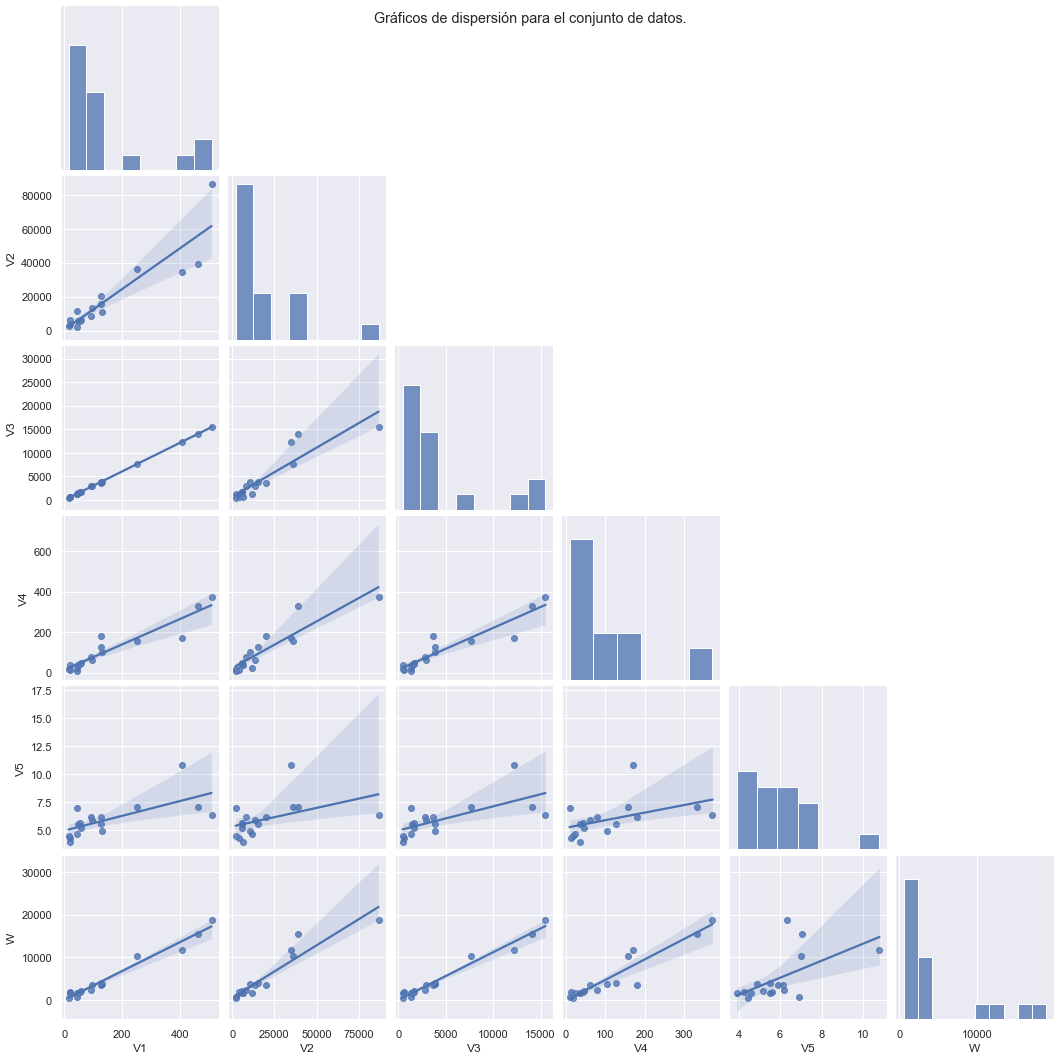

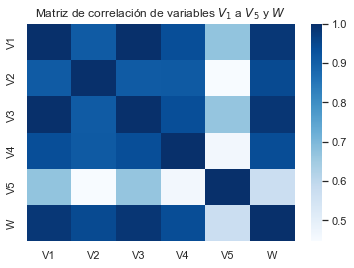

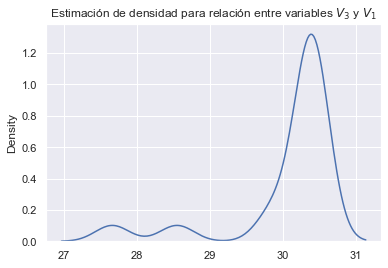

In [5]:
# Análisis de colinealidad.
## Inciso 1.
sns.pairplot(df,corner=True,kind='reg').fig.suptitle('Gráficos de dispersión para el conjunto de datos.')
plt.figure()
sns.heatmap(df.corr(),cmap='Blues').set(title='Matriz de correlación de variables $V_1$ a $V_5$ y $W$')
plt.figure()
sns.kdeplot(df.V3/df.V1,bw_method=0.3)
plt.title('Estimación de densidad para relación entre variables $V_3$ y $V_1$')

Se verifica que, efectivamente, la relación entre el número de pacientes diarios promedio y los días-cama es de aproximadamente 30, por lo que puede considerarse eliminar una de estas variables, ya que conllevan prácticamente la misma información (número de pacientes atendidos). Antes de eliminarlos, sin embargo, se realiza el análisis completo de colinealidad, y posteriormente se decide qué hacer con estos valores. 

##### Inciso 2.

Puede observarse que el número de condición de la matriz es muy elevado, lo que elucida una diferencia muy grande entre el mayor y menor valor singular de la matriz de datos, y sugiere problemas numéricos. También se ve elevado por la diferencia en escalas de las distintas variables, pero esto fue mencionado anteriormente. 

In [6]:
## Inciso 2.
X = df.drop('W',axis=1).to_numpy()
Xcond = np.linalg.cond(X)
print(f"Número de condición de la matriz X: {Xcond:.3e}")

Número de condición de la matriz X: 1.270e+04


##### Inciso 3.

Puede observarse que, cuando se escalan y centran los datos, el número de condición se reduce en casi dos órdenes de magnitud, llegando a un valor de cerca de 200, que si bien sigue sugiriendo la posible presencia de colinealidad fuerte, el número de condición es mucho menor que antes.

In [7]:
## Inciso 3.
Xc = StandardScaler().fit_transform(X)
Xcond = np.linalg.cond(Xc)
print(f"Número de condición de la matriz Xc: {Xcond:.3f}")

Número de condición de la matriz Xc: 222.643


##### Inciso 4.
Puede observarse de los factores de inflación de varianza que el mayor es de 357.83, y el segundo mayor de 337.35, correspondientes a la primera y tercera variable, por lo que se espera que en el modelo por mínimos cuadrados la varianza de los estimadores de estas variables sean muy elevadas, pudiendo llegar a provocar que se crea que no son estadísticamente significativas por la presencia de colinealidad.

In [8]:
## Inciso 4.
R = Xc.T @ Xc
VIF = np.diag(np.linalg.inv(R))
with np.printoptions(precision=2,suppress=True):
    print(f'Factores de inflación de la varianza: {VIF}')

Factores de inflación de la varianza: [357.83   0.47 337.35   0.96   0.28]


##### Inciso 5.
Puede observarse en la matriz $\Pi$ que, efectivamente, existe una fuerte colinealidad asociada al cuarto número de condición, que, partiendo de los análisis anteriores, puede concluirse que es entre las variables $V_1$ y $V_3$. La presencia de esta colinealidad puede aumentar fuertemente la varianza de los estimadores del modelo lineal por mínimos cuadrados, por lo que se sugiere o eliminar una de las variables del modelo, o utilizar regresión regularizada (por ejemplo, Lasso o Ridge).

Text(0.5, 12.5, 'Estimador')

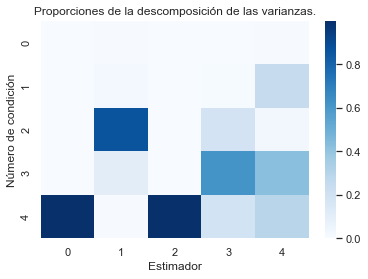

In [9]:
## Inciso 5.
U, D, Vh = np.linalg.svd(Xc) # NOTA: Vh = V.T
phis = Vh.T**2/D**2
pis = phis.T/sum(phis.T)

sns.heatmap(pis,cmap='Blues')
plt.title('Proporciones de la descomposición de las varianzas.')
plt.ylabel('Número de condición')
plt.xlabel('Estimador')

#### Regresión ridge
##### Inciso 1.
Utilizando el estimador del parámetro de Ridge propuesto, se obtiene el siguiente valor:

In [10]:
p = 5 # Número de parámetros a utilizar
n = len(Xc)
res = np.linalg.lstsq(Xc,df['W'].to_numpy().T,rcond=-1)
beta = res[0]
SSR = res[1]
sigma2 = SSR/(n-p)
lamb = p*sigma2/sum(beta**2)
print(f'Parámetro de Ridge estimado: {lamb[0]:.4f}')

Parámetro de Ridge estimado: 1.0156


##### Inciso 2.
Para el método de validación cruzada, se realiza con ayuda de los modelos Ridge de sklearn. Puede observarse que el resultado de la validación cruzada cuando solamente se deja un valor fuera contra si se hace un 5-fold CV muestra dos valores de parámetro de Ridge sumamente distintos. En la gráfica en la que se muestra el error cuadrático medio contra $\lambda$ para cada valor removido, puede observarse que existe un punto sumamente influyente, por lo que hace que se desplace tanto en el parámetro de Ridge estimado con el estimador de mínimos cuadrados usando todos los valores, como por validación cruzada. Esto sugiere que existe un punto sumamente influyente en la regresión, que tenga mucho "apalancamiento" sobre el valor de los estimadores; sospecha que se observa desde el primer inciso en el análisis de colinealidad – incluso desde el análisis previo – al notar que la distribución tiene valores sumamente alejados de las medidas de tendencia central. Por esto, se toma el valor de parámetro de Ridge menor, y se considera la opción de transformar los datos y no solo estandarizarlos. Este ejercicio se verá tras ser respondidos todos los incisos. 

Con validación cruzada Leave One Out
Error cuadrático medio: 500846.57397637964
Valor del parámetro de Ridge: 1.389495494373136
Con 5-fold CV:
Error cuadrático medio: 325283.5424489137
Valor del parámetro de Ridge: 0.2559547922699533


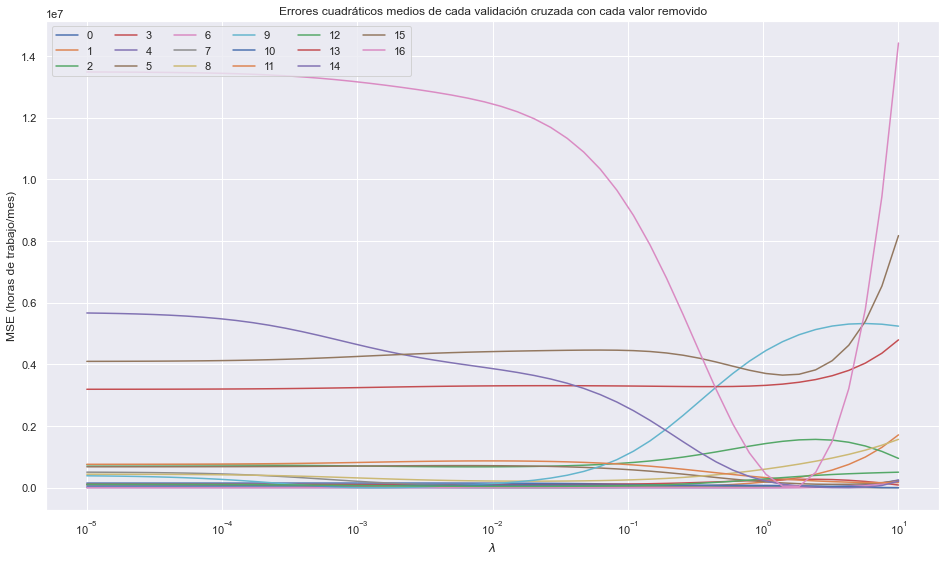

In [11]:
lambdas = np.logspace(-5,1)
# Modelo con LOOCV
ridge = RidgeCV(lambdas,store_cv_values=True).fit(Xc,df['W'])
plt.figure(figsize=(16,9))
plt.plot(lambdas,ridge.cv_values_.T)
plt.xscale('log')
plt.title('Errores cuadráticos medios de cada validación cruzada con cada valor removido')
plt.xlabel('$\lambda$')
plt.ylabel('MSE (horas de trabajo/mes)')
plt.legend(df.index.to_numpy(),loc='upper left',ncol=6)
print('Con validación cruzada Leave One Out')
print(f'Error cuadrático medio: {mean_squared_error(df["W"],ridge.predict(Xc))}')
print(f'Valor del parámetro de Ridge: {ridge.alpha_}')

# Modelo con 5-Fold CV
folder = KFold(5,shuffle=True,random_state=9)
ridge_2 = RidgeCV(lambdas,cv=folder).fit(Xc,df['W'])
print('Con 5-fold CV:')
print(f'Error cuadrático medio: {mean_squared_error(df["W"],ridge_2.predict(Xc))}')
print(f'Valor del parámetro de Ridge: {ridge_2.alpha_}')


##### Inciso 3. 
A continuación se muestran los valores predichos por los modelos, así como sus parámetros en la traza de Ridge. Se añade adicionalmente una estimación de la distribución de los residuales con cada regresión. 

Parámetros:
 Ridge heurística: [1789.51214424 1339.21595168 1864.64718793  439.50409058 -168.34325404]
 Ridge LOOCV: [1680.68197642 1346.36298023 1740.8702524   591.94206841  -89.36644251]
 Ridge 5-fold_ [2244.86274015 1248.1296321  2430.60583907 -253.08903909 -492.27723077]


,W ridge heurística,W ridge LOOCV,W ridge 5-fold
0,707.954120,696.563467,801.712875
1,1041.654980,1102.231476,859.228087
2,914.118285,879.705927,1103.318373
3,1182.782343,1167.042227,1271.616396
4,1666.993584,1686.271751,1628.349638
5,1991.713891,1956.139355,2166.367039
6,1835.804976,1863.011607,1762.275126
7,1938.893107,1945.542579,1946.565694
8,3008.928737,3059.315125,2826.337592
9,4887.985776,5045.170147,4178.590185


Kurtosis en exceso de cada distribución de residuales:
W ridge heurística    1.003455
W ridge LOOCV         1.047082
W ridge 5-fold        1.646048
dtype: float64


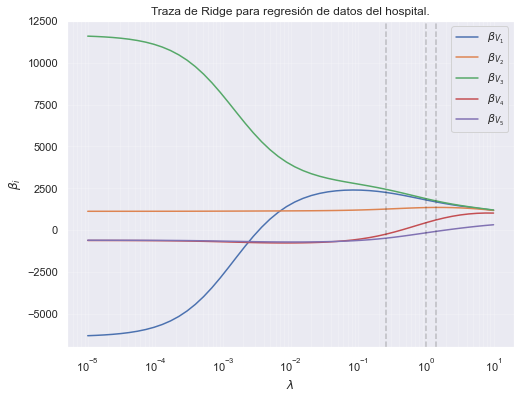

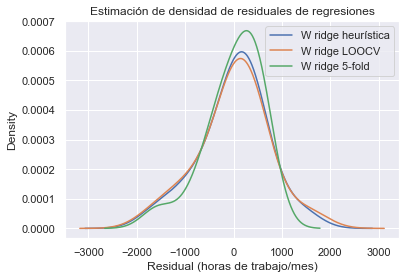

In [12]:

coefs = []
scores = []
for value in lambdas:
    model = Ridge(value).fit(Xc,df['W'])
    coefs.append(model.coef_)
plt.figure(figsize=(8,6))
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('$\\beta_i$')
plt.legend(['$\\beta_{V_1}$','$\\beta_{V_2}$','$\\beta_{V_3}$','$\\beta_{V_4}$','$\\beta_{V_5}$'])
plt.ylim(-7000,12500)
plt.grid(which='both',alpha=0.2)
plt.vlines(
    x = [lamb[0], ridge_2.alpha_, ridge.alpha_],
    ymin = -7000,
    ymax = 12500, 
    label = ['Estimado con ecuación','Estimado con CV 5-fold', 'Estimado con LOOCV'],
    colors = 'black',
    alpha = 0.2,
    linestyles = 'dashed'
    )
plt.title('Traza de Ridge para regresión de datos del hospital.')

Y = df['W']
heur = Ridge(lamb[0]).fit(Xc,Y)
Y_ridge_h = heur.predict(Xc)
Y_ridge_1 = ridge.predict(Xc)
Y_ridge_2 = ridge_2.predict(Xc)
preds = pd.DataFrame(data= {
    'W ridge heurística': Y_ridge_h,
    'W ridge LOOCV': Y_ridge_1,
    'W ridge 5-fold': Y_ridge_2
})
print(f'Parámetros:\n Ridge heurística: {heur.coef_}\n Ridge LOOCV: {ridge.coef_}\n Ridge 5-fold_ {ridge_2.coef_}')
display(preds)
preds.transform(lambda x: x-Y).plot.kde()
plt.title('Estimación de densidad de residuales de regresiones')
plt.xlabel('Residual (horas de trabajo/mes)')
print(f'Kurtosis en exceso de cada distribución de residuales:\n{preds.transform(lambda x: x-Y).kurtosis()}')

Puede verse en el gráfico de estimación de densidad que aunque se aproximan a una normal los residuales estimados, la kurtosis en exceso es un poco mayor que una normal, lo que sugiere colas un poco más pesadas. 

##### Inciso 4. 
A continuación se muestran los gráficos de $Y_i$ contra $\widehat{Y}_i$ para cada una de las regresiones.

Text(0.5, 1.0, 'Ridge con 5-Fold CV')

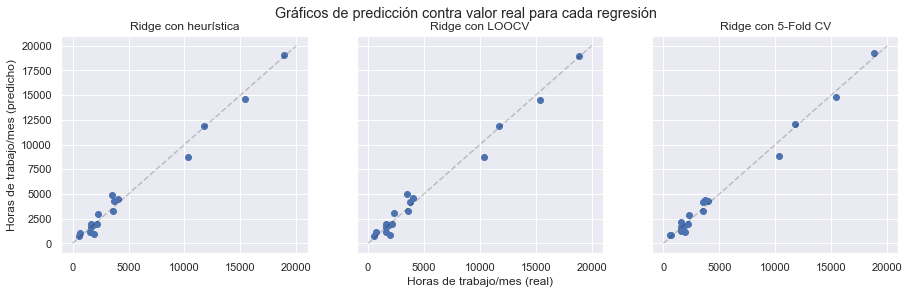

In [13]:
fig, axs = plt.subplots(1,3,sharex=True,sharey=True)
fig.set(figwidth=15)
fig.suptitle('Gráficos de predicción contra valor real para cada regresión')
lims = [1,20000]
axs[0].scatter(Y,Y_ridge_h)
axs[0].plot(lims,lims,alpha=0.2,color='black',linestyle='dashed')
axs[1].scatter(Y,Y_ridge_1)
axs[1].plot(lims,lims,alpha=0.2,color='black',linestyle='dashed')
axs[2].scatter(Y,Y_ridge_2)
axs[2].plot(lims,lims,alpha=0.2,color='black',linestyle='dashed')
axs[0].set_ylabel('Horas de trabajo/mes (predicho)')
axs[1].set_xlabel('Horas de trabajo/mes (real)')
axs[0].set_title('Ridge con heurística')
axs[1].set_title('Ridge con LOOCV')
axs[2].set_title('Ridge con 5-Fold CV')

De estas gráficas puede observarse que las predicciones tienden a estar cerca de la línea identidad, lo cual sugiere que el modelo se acerca a las predicciones esperadas. Se observa nuevamente que probablemente los 4 valores más elevados pueden tender a ser muy influyentes en los parámetros de la regresión, pues se encuentran  muy separados del resto de los valores. 
##### Inciso 5.
Se respondió a la vez que el inciso 3, para mostrar los valores de los parámetros. 
##### Inciso 6. 
A continuación se muestran los factores de inflación de varianza calculados, tanto para un modelo lineal ordinario como para el Ridge, con las siguientes ecuaciones:
$$VIF_j=n(\mathbf{X}_c^T\mathbf{X}_c)^{-1}_{jj},j=\{1,2,...,p\}$$
Para los VIF de Ridge:
$$VIF_j=n\left[(\mathbf{X}_c^T\mathbf{X}_c+\lambda I)^{-1}\mathbf{X}_c^T\mathbf{X}_c(\mathbf{X}_c^T\mathbf{X}_c+\lambda I)^{-1}\right]_{jj}$$
Los VIF son los siguientes:

In [14]:
# VIF lineal
VIFs = n*np.diag(np.linalg.inv(Xc.T@Xc))
# VIF ridges:
lambdas = {'Heurística': lamb[0], 'LOOCV:': ridge.alpha_, '5-Fold CV': ridge_2.alpha_}
with np.printoptions(precision=2,suppress=True):
    print(f'VIF lineal: {VIFs}')
    for value in lambdas:
        mat = np.linalg.inv(Xc.T@Xc + lambdas[value]*np.eye(p)) @ Xc.T@Xc @ np.linalg.inv(Xc.T@Xc + lambdas[value]*np.eye(p))
        vals = (n*np.diag(mat))
        print(f'VIF de ridge {value}: {vals}')

VIF lineal: [6083.13    7.95 5734.87   16.35    4.8 ]
VIF de ridge Heurística: [1.07 2.9  1.19 2.94 1.41]
VIF de ridge LOOCV:: [0.75 2.25 0.83 2.13 1.23]
VIF de ridge 5-Fold CV: [3.39 5.76 3.78 7.77 2.34]


##### Inciso 7.

La regresión Ridge ayuda para disminuir los problemas de colinealidad, observado claramente con la reducción en los factores de inflación de la varianza. Las predicciones se acercan a los valores reales, y los residuales se aproximan a una distribución normal. Debido a que existían algunos valores más influyentes en las distribuciones, las validaciones cruzadas muestran valores muy diferentes dependiendo de los datos usados para la validación. Si no se hace regresión Ridge, puede parecer que algunas variables no son significativas para explicar las horas de trabajo por mes, a pesar de ser muy buenos predictores, debido al incremento de varianza en los estimadores provocados por la colinealidad.  